# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [41]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "../resources/city_data.csv"
ride_data_to_load = "../resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
rides_total = pyber_data_df.groupby('type').count()['ride_id']
rides_total

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
drivers_total = city_data_df.groupby('type').sum()['driver_count']
drivers_total

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type
fares_total = pyber_data_df.groupby('type').sum()['fare']
fares_total

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 
fare_per_ride_avg = fares_total / rides_total
fare_per_ride_avg

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type. 
fare_per_driver_avg = fares_total / drivers_total
fare_per_driver_avg

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [8]:
#  6. Create a PyBer summary DataFrame. 
columns_names = ['Total Rides', 'Total Drivers', 'Total Fares', 'Average Fare per Ride', 'Average Fare per Driver']
pyber_summary_df = pd.DataFrame([rides_total, drivers_total, fares_total, fare_per_ride_avg, fare_per_driver_avg], index = columns_names)
pyber_summary_df = pyber_summary_df.transpose()
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125.0,78.0,4327.93,34.623440,55.486282
Suburban,625.0,490.0,19356.33,30.970128,39.502714
Urban,1625.0,2405.0,39854.38,24.525772,16.571468


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [10]:
#  8. Format the columns.
pyber_summary_df['Total Rides'] = pyber_summary_df['Total Rides'].map('{:,.0f}'.format)
pyber_summary_df['Total Drivers'] = pyber_summary_df['Total Drivers'].map('{:,.0f}'.format)
pyber_summary_df['Total Fares'] = pyber_summary_df['Total Fares'].map('{:,.0f}'.format)
pyber_summary_df['Average Fare per Ride'] = pyber_summary_df['Average Fare per Ride'].map('${:,.2f}'.format)
pyber_summary_df['Average Fare per Driver'] = pyber_summary_df['Average Fare per Driver'].map('${:,.2f}'.format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"4,328",$34.62,$55.49
Suburban,625,490,"19,356",$30.97,$39.50
Urban,"1,625","2,405","39,854",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame
pyber_data_df.tail()

,city,date,fare,ride_id,driver_count,type
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural
2374,Newtonview,2019-04-25 10:20:13,55.84,9990581345298,1,Rural


In [12]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
type_date_df = pyber_data_df.groupby(['date', 'type'])
type_date_df = type_date_df[["fare"]].sum()
type_date_df.head()

,,fare
date,type,
2019-01-01 00:08:16,Urban,37.91
2019-01-01 00:46:46,Suburban,47.74
2019-01-01 02:07:24,Suburban,24.07
2019-01-01 03:46:50,Urban,7.57
2019-01-01 05:23:21,Urban,10.75


In [13]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
type_date_df = type_date_df.reset_index()
type_date_df.head()

,date,type,fare
0,2019-01-01 00:08:16,Urban,37.91
1,2019-01-01 00:46:46,Suburban,47.74
2,2019-01-01 02:07:24,Suburban,24.07
3,2019-01-01 03:46:50,Urban,7.57
4,2019-01-01 05:23:21,Urban,10.75


In [14]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
type_date_pivot = type_date_df.pivot(index="date", columns="type", values="fare")
type_date_pivot.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [15]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
jan_apr_2019_df = type_date_pivot.loc['2019-01-01':'2019-04-29']
jan_apr_2019_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [16]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
jan_apr_2019_df.index = pd.to_datetime(jan_apr_2019_df.index)
jan_apr_2019_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [17]:
# 7. Check that the datatype for the index is datetime using df.info()
jan_apr_2019_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [18]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
jan_apr_2019_weekly_df = jan_apr_2019_df.resample('W').sum()
jan_apr_2019_weekly_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


In [44]:
jan_apr_2019_weekly_df.index

DatetimeIndex(['2019-01-06', '2019-01-13', '2019-01-20', '2019-01-27',
               '2019-02-03', '2019-02-10', '2019-02-17', '2019-02-24',
               '2019-03-03', '2019-03-10', '2019-03-17', '2019-03-24',
               '2019-03-31', '2019-04-07', '2019-04-14', '2019-04-21',
               '2019-04-28'],
              dtype='datetime64[ns]', name='date', freq='W-SUN')

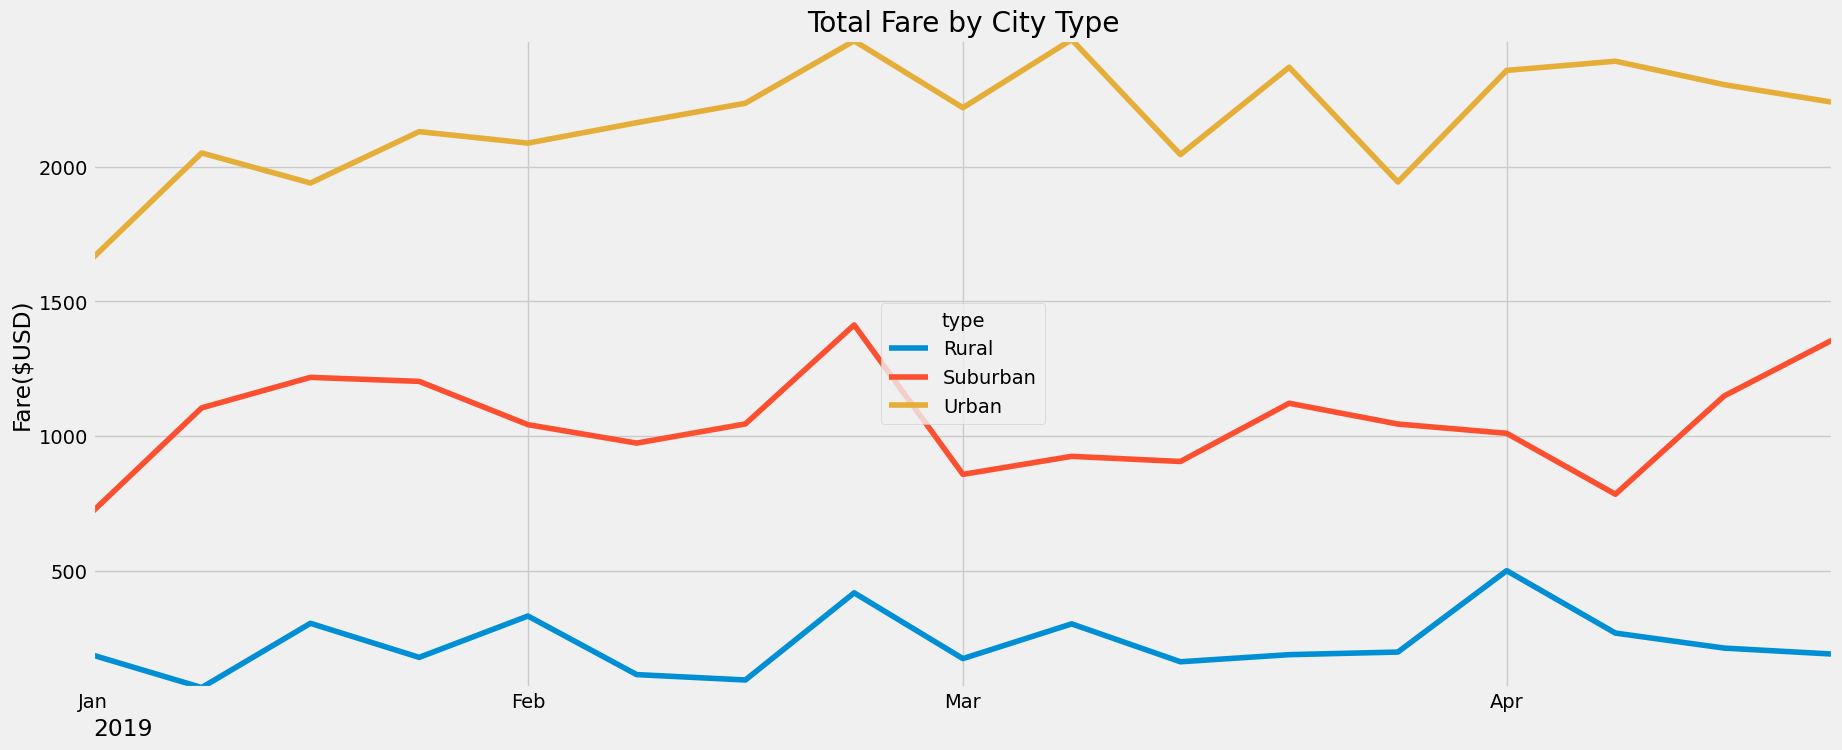

In [56]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(jan_apr_2019_weekly_df)

#adding labels
plt.title("Total Fare by City Type")
plt.ylabel("Fare($USD)")
plt.xlabel("2019",  horizontalalignment='left', x=0.0)
plt.grid(True)
plt.xticks(['2019-01-06','2019-02-03','2019-03-03','2019-04-07'],['Jan','Feb','Mar','Apr'])
plt.margins(0)

#legend
plt.legend(title='type', labels=['Rural', 'Suburban', 'Urban'], loc='center')

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

#save graph
plt.savefig("analysis/PyBer_fare_summary.png")